# Описание располагаемых данных

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`address` | адрес|

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по теме 5.1-5.3.

Шаг 2. Создайте аналитическую программу, которая считывает текст из файла (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3).

Шаг 3. Реализуйте алгоритм предварительной обработки данных, который подсчитывает количество вхождений слов (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). Посчитайте количество вхождений для следующего набора слов
```python
'улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек', 'проспект', 'набережная', 'аллея', 'квартал', 'линия'
```

Шаг 4. Используя библиотеку matplotlib, визуализируйте полученные результаты (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). 

Шаг 5. Опубликуйте ссылку на файл расширения ipynb, прикрепив его в этом задании.

In [2]:
# Ваш код здесь

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Считывание из файла

In [4]:
df = pd.read_csv('dataset_address.csv')
df.head(2)

,id,object_name,address
0,151635,СМЕТАНА,"город Москва, улица Егора Абакумова, дом 9"
1,77874,Родник,"город Москва, улица Талалихина, дом 2/1, корпус 1"


#### Проверка пропусков и типов

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   address      15366 non-null  object
dtypes: int64(1), object(2)
memory usage: 360.3+ KB


#### Проверка дубликатов

In [6]:
df.duplicated().sum()

0

#### Подсчет количества вхождения слов по заданному списку 

In [7]:
vocab = ['улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек', 'проспект', 'набережная', 'аллея', 'квартал', 'линия']

In [8]:
res_words = {voc: df["address"].str.contains(voc).sum() for voc in vocab}

In [9]:
res_words

{'улица': 9088,
 'переулок': 725,
 'шоссе': 1325,
 'площадь': 385,
 'бульвар': 752,
 'проезд': 792,
 'тупик': 15,
 'просек': 4,
 'проспект': 1444,
 'набережная': 390,
 'аллея': 44,
 'квартал': 16,
 'линия': 6}

#### Визуализация данных с использованием библиотеки matplotlib

##### столбчатая диаграмма

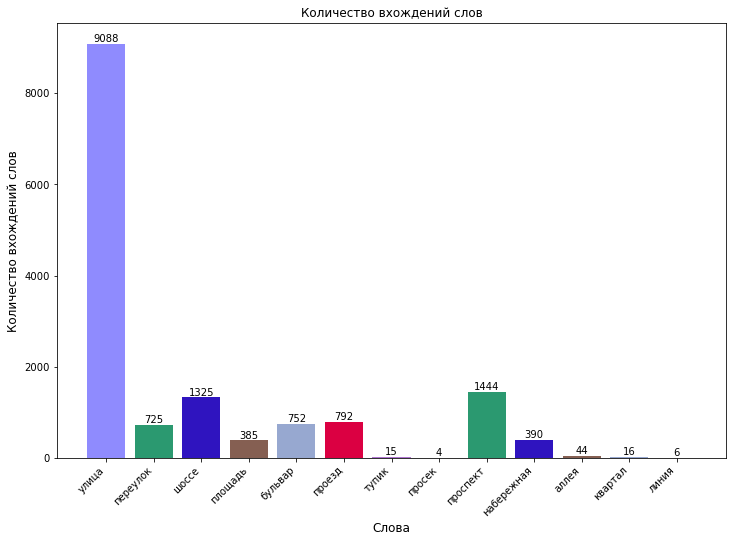

In [10]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
color_rectangle = np.random.rand(7, 3)
p1 = ax.bar(list(res_words.keys()),list(res_words.values()), color = color_rectangle,);
ax.set_title("Количество вхождений слов")
ax.bar_label(p1)
plt.ylabel('Количество вхождений слов', fontsize = 12);
plt.xlabel('Слова', fontsize = 12);
plt.xticks(rotation=45, ha='right')

plt.show()

##### круговая диаграмма

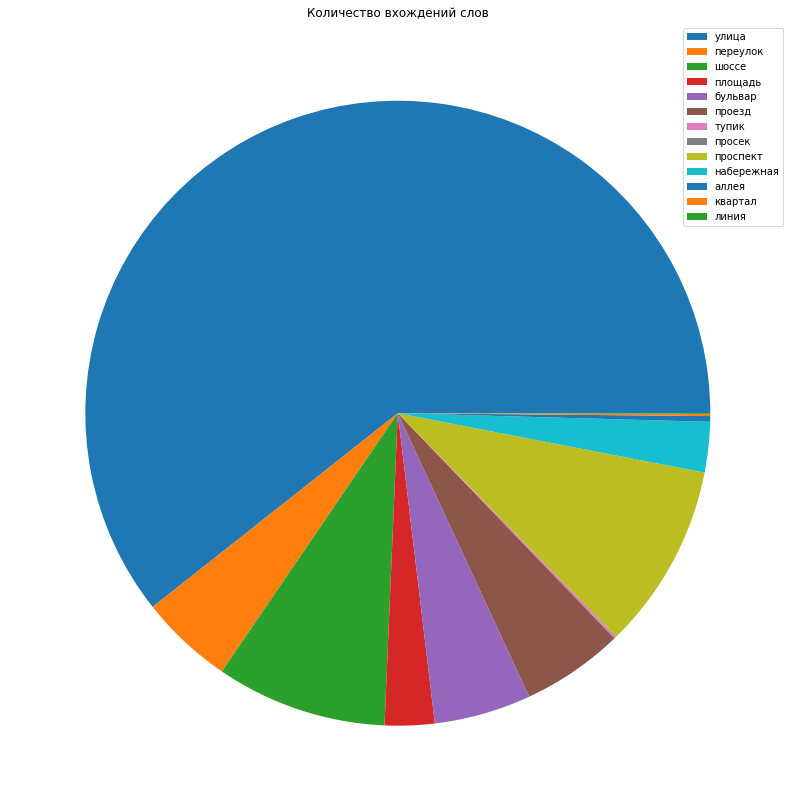

In [13]:
fig = plt.figure(figsize=(14,18))
ax = plt.axes()
ax.pie(list(res_words.values()));
ax.legend(labels = list(res_words.keys()))
ax.set_title("Количество вхождений слов")
plt.show()